<a href="https://colab.research.google.com/github/Ekpenyong-Esu/Reinforcement-Leaening-Exercise/blob/main/01RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import tensorflow as tf          # import tensorflow
import numpy as np                # import numpy
from tensorflow import keras       #import keras


In [62]:
# for reproducibility
np.random.seed(1671)

# network and training
EPOCHS = 200        # how many time to run the model
BATCH_SIZE = 128    # number of item fed to the network at a single EPOCH
VERBOSE = 1         # Means not too much details
NB_CLASSES = 10   # number of outputs = number of digits
N_HIDDEN = 128        # Number of output or neuron
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [63]:
# loading MNIST dataset
# verify
# the split between train and test is 60,000, and 10,000 respectly 
# one-hot is automatically applied
mnist = keras.datasets.mnist              # How to load the mnist Datasets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() # split to X_test and Y_train 
print(X_train.shape[0], 'train samples') # X_train = 60,000 sample
print(X_test.shape[0], 'test samples')    #Y_train = 10,000 

60000 train samples
10000 test samples


In [64]:
single_image = X_train[0]
single_image.shape

(28, 28)

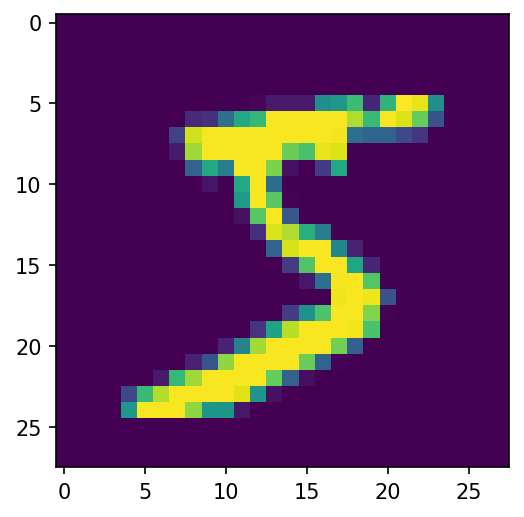

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.imshow(single_image)

In [66]:
#it is an image With RGb value of 0 to 255. Hence we normalize by dividing it by 255
X_train, X_test = X_train / 255.0, X_test / 255.0

In [67]:
from tensorflow.keras.utils import to_categorical


In [68]:
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
Y_train = to_categorical(Y_train).astype('float32')
Y_test = to_categorical(Y_test).astype('float32')




In [69]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES,
   		input_shape=(RESHAPED,),
   		name='dense_layer', activation='softmax'))

In [70]:
# summary of the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [71]:
# compiling the model
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
#training the moodel
model.fit(X_train, Y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT) # note that percentage of the data is kept for vallidation and
                                                        # is called validation split

Epoch 1/200
375/375 [==============================] - 1s 3ms/step - loss: 1.3725 - accuracy: 0.6606 - val_loss: 0.8929 - val_accuracy: 0.8278
Epoch 2/200
375/375 [==============================] - 1s 3ms/step - loss: 0.7934 - accuracy: 0.8284 - val_loss: 0.6558 - val_accuracy: 0.8592
Epoch 3/200
375/375 [==============================] - 1s 3ms/step - loss: 0.6437 - accuracy: 0.8511 - val_loss: 0.5608 - val_accuracy: 0.8703
Epoch 4/200
375/375 [==============================] - 1s 3ms/step - loss: 0.5712 - accuracy: 0.8623 - val_loss: 0.5078 - val_accuracy: 0.8786
Epoch 5/200
375/375 [==============================] - 1s 3ms/step - loss: 0.5270 - accuracy: 0.8688 - val_loss: 0.4739 - val_accuracy: 0.8831
Epoch 6/200
375/375 [==============================] - 1s 3ms/step - loss: 0.4967 - accuracy: 0.8742 - val_loss: 0.4499 - val_accuracy: 0.8878
Epoch 7/200
375/375 [==============================] - 2s 5ms/step - loss: 0.4742 - accuracy: 0.8786 - val_loss: 0.4319 - val_accuracy: 0.8907

In [74]:

#evalute the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

# making prediction
predictions = model.predict(X_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.2770 - accuracy: 0.9226
Test accuracy: 0.9225999712944031
313/313 [==============================] - 0s 1ms/step
